## Importação de bibliotecas necessárias para o modelo de ML

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

### Criando o DF (DataFrame)

In [2]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [3]:
df_vendas = pd.DataFrame.from_dict(dados_vendas)
df_vendas

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


- Uma nova coluna para representar os meses em números

In [4]:
df_vendas['data'] = range(1, 13)

In [5]:
df_vendas

,mes,vendas,data
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


### Criando as variáveis para treino e teste do modelo
- É criado um dataframe na variável X ao selecionar a coluna com o uso de colchetes duplos , essa criação é necessária para que o modelo consoga fazer os testes e treinamentos

In [6]:
X = df_vendas[['data']]
y = df_vendas['vendas']

In [7]:
X

,data
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [8]:
y

0     2000
1     2200
2     2300
3     2500
4     2600
5     2700
6     2800
7     2900
8     3000
9     3100
10    3200
11    3300
Name: vendas, dtype: int64

- Utilizando a função train_test_split para dividir os conjuntos de treinamento, usando argumentos train_size = tamanho do conjunto de treino, medido em porcentagem (para conjuntos menores é utilizado de 70 a 80% dos dados), e random_state = garantindo que a aleatoriedade dos resultados não fuja dos dados dos conjuntos de treinamento e teste

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

- Foi preferível manter a divisão 60/40, pois ao descobrir o MSE e MAE foi perceptível a melhora do modelo

In [10]:
len(X_train)

8

In [11]:
len(y_train)

8

### Criando o modelo de treinamento

In [67]:
modelo = LinearRegression().fit(X_train, y_train)

                                     

- identificando coeficientes e interceptos do modelo

In [68]:
modelo.coef_, modelo.intercept_

(array([109.47580645]), np.float64(2015.9274193548385))

- Realizando a previsão de vendas para o mes de Dezembro, entregando a saida [[12]] para a função predict. O modelo ira prever o resultado do 12º ponto da série temporal

In [69]:
vendas_dezembro = modelo.predict([[12]])
print(f'Previsão para Dezembro {round(vendas_dezembro[0], 2)}')

Previsão para Dezembro 3329.64


c:\Users\Carolina\.virtualenvs\modelo_diabetes-ivujDSb1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
y_pred = modelo.predict(X_test)
y_pred

array([3220.16129032, 3110.68548387, 2125.40322581, 3001.20967742,
       2672.78225806])

In [71]:
# R² Score
print('Descobrindo R² para explicar a variabilidade dos dados')
print(f'R²: {round(r2_score(y_test, y_pred), 2)}')
# MSE
print()
print('Medindo MSE para ajustar acurácia')
print(f'MSE: {round(mean_squared_error(y_test, y_pred), 2)}')
print()
# MAE
print('Medindo MAE para calcular o resíduo das previsões')
print(f'MAE: {round(mean_absolute_error(y_test, y_pred), 2)}')


Descobrindo R² para explicar a variabilidade dos dados
R²: 0.98

Medindo MSE para ajustar acurácia
MSE: 3397.78

Medindo MAE para calcular o resíduo das previsões
MAE: 36.94


### Scatter_Matrix
- Observando a correlação na distribuição dos valores das variaveis

Text(0.5, 0.98, 'Distribuição')

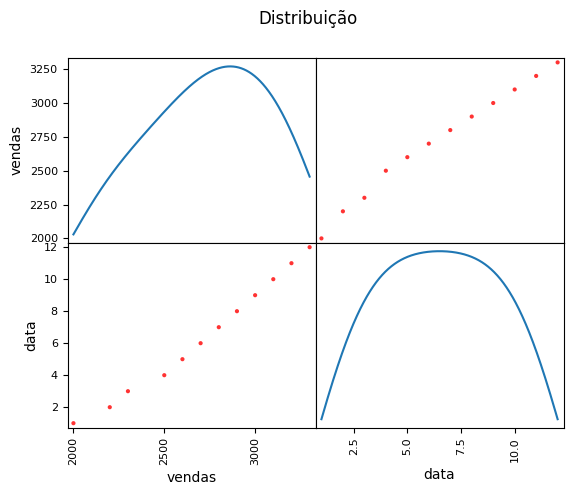

In [16]:
pd.plotting.scatter_matrix(df_vendas, diagonal='kde', alpha=0.8, color='red')
plt.suptitle('Distribuição')

- Entendendo a disperção e distribuição das variáveis

Text(0, 0.5, 'Vendas')

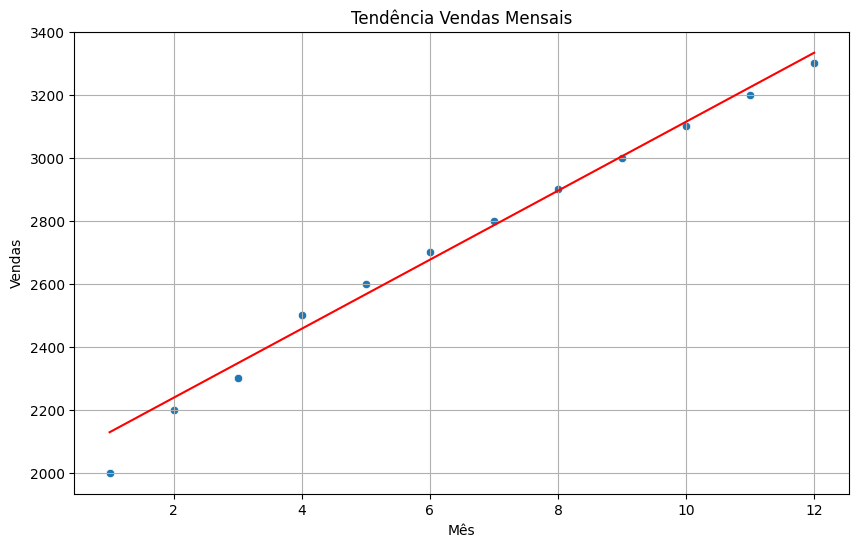

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='data', y='vendas', data=df_vendas)
plt.plot(df_vendas['data'], modelo.predict(df_vendas[['data']]), color='red')
plt.title('Tendência Vendas Mensais')
plt.grid(True)
plt.xlabel('Mês')
plt.ylabel('Vendas')

- Entendendo a densidade das variáveis

Text(0.5, 0.98, 'Histograma')

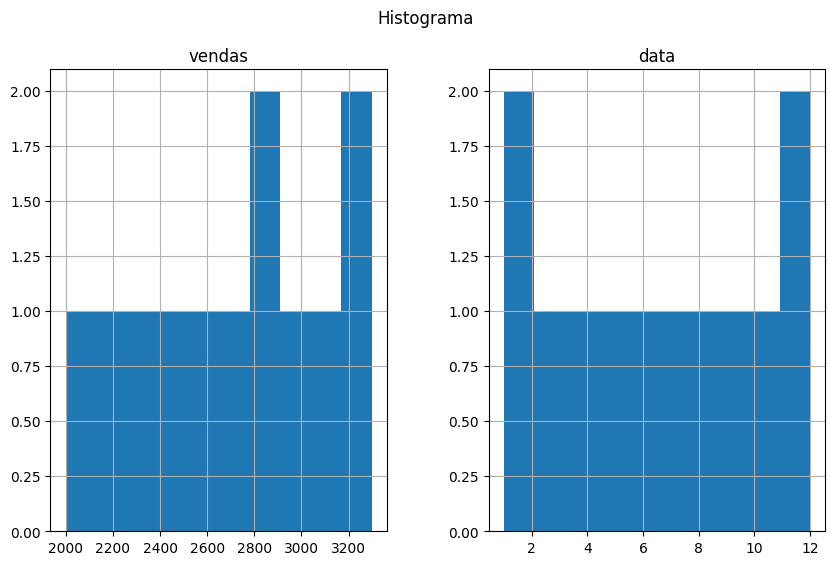

In [18]:
df_vendas.hist(figsize=(10, 6))
plt.suptitle('Histograma')